In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split 
import warnings

In [62]:
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv(r"C:\Users\Student\Desktop\nga_rainfall_indicator_prediction_model\nigeria_rainfall_processed_ds.csv")

In [64]:
df.columns

Index(['date', 'adm2_id', 'ADM2_PCODE', 'n_pixels', 'rfh', 'rfh_avg', 'r1h',
       'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version'],
      dtype='object')

In [65]:
df['date']=pd.to_datetime(df['date'])

eplison = 1e-10
df['r3h']=df['r3h'].replace(0,eplison) #replace null value with eplison for mape calc

df.set_index('date', inplace=True)


In [66]:
df.info

<bound method DataFrame.info of             adm2_id ADM2_PCODE  n_pixels      rfh  rfh_avg       r1h  \
date                                                                   
2000-01-01    22980   NG029014      28.0   2.2143   3.2274    5.3214   
2000-01-11    22980   NG029014      28.0   6.7500   3.7071   11.0714   
2000-01-21    22980   NG029014      28.0   4.8214   6.0607   13.7857   
2000-02-01    22980   NG029014      28.0   2.3214   9.3012   13.8929   
2000-02-11    22980   NG029014      28.0   2.2143  15.7690    9.3571   
...             ...        ...       ...      ...      ...       ...   
2024-03-11    23001   NG030013      33.0  18.5758  33.0414   93.6667   
2024-03-21    23001   NG030013      33.0  13.6667  36.7737   90.7273   
2024-04-01    23001   NG030013      33.0  40.3333  40.6788   72.5758   
2024-04-11    23001   NG030013      33.0  20.7576  43.4556   74.7576   
2024-04-21    23001   NG030013      33.0  78.0000  44.0737  139.0909   

             r1h_avg       r3h 

In [67]:
df.describe

<bound method NDFrame.describe of             adm2_id ADM2_PCODE  n_pixels      rfh  rfh_avg       r1h  \
date                                                                   
2000-01-01    22980   NG029014      28.0   2.2143   3.2274    5.3214   
2000-01-11    22980   NG029014      28.0   6.7500   3.7071   11.0714   
2000-01-21    22980   NG029014      28.0   4.8214   6.0607   13.7857   
2000-02-01    22980   NG029014      28.0   2.3214   9.3012   13.8929   
2000-02-11    22980   NG029014      28.0   2.2143  15.7690    9.3571   
...             ...        ...       ...      ...      ...       ...   
2024-03-11    23001   NG030013      33.0  18.5758  33.0414   93.6667   
2024-03-21    23001   NG030013      33.0  13.6667  36.7737   90.7273   
2024-04-01    23001   NG030013      33.0  40.3333  40.6788   72.5758   
2024-04-11    23001   NG030013      33.0  20.7576  43.4556   74.7576   
2024-04-21    23001   NG030013      33.0  78.0000  44.0737  139.0909   

             r1h_avg       r3

In [73]:
round(df.describe(),3) 

,adm2_id,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q
count,665664.000,665664.000,665664.000,665664.000,665664.000,665664.000,665664.000,665664.000,665664.000,665664.000,665664.000
mean,622581.931,38.949,39.111,39.523,117.123,118.333,350.839,354.354,99.841,99.817,100.029
std,475970.027,46.614,43.940,39.558,118.912,115.063,310.416,309.675,37.077,27.008,21.731
min,22590.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,5.143,14.921,17.646
25%,22921.000,10.000,1.842,2.758,7.286,9.896,65.238,68.559,79.331,85.644,88.308
50%,1000150.000,24.000,24.600,28.878,86.286,90.106,296.500,301.433,99.579,99.783,99.346
75%,1000345.000,50.000,64.733,67.064,197.344,200.437,561.759,568.216,111.893,109.618,108.980
max,1008879.000,341.000,516.000,217.522,926.800,620.721,2052.688,1325.016,654.546,440.679,440.341


In [68]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

train['date_ordinal']=train.index.map(pd.Timestamp.toordinal)
test['date_ordinal']=test.index.map(pd.Timestamp.toordinal)

x_train=train[['date_ordinal']]
y_train=train['r3h']
x_test=test[['date_ordinal']]
y_test=test['r3h']

In [70]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [71]:
mape=mean_absolute_percentage_error(y_test,y_pred)
mape

151529040880.88083

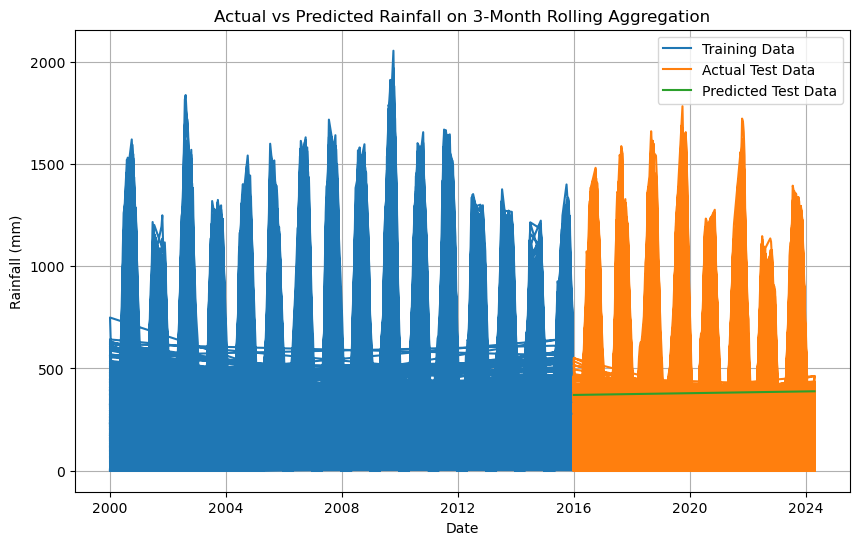

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['r3h'], label='Training Data')
plt.plot(test.index, test['r3h'], label='Actual Test Data')
plt.plot(test.index, y_pred, label='Predicted Test Data')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall on 3-Month Rolling Aggregation')
plt.legend()
plt.grid()
plt.show()
